## 1.importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

## loading the dataset 

In [2]:
df = pd.read_csv('sales.csv')
print(df.head())

    Brands        Models         Colors Memory Storage Camera  Rating  \
0  SAMSUNG  GALAXY M31S    Mirage Black   8 GB  128 GB    Yes     4.3   
1    Nokia           3.2          Steel   2 GB   16 GB    Yes     3.8   
2   realme           C2   Diamond Black   2 GB     NaN    Yes     4.4   
3  Infinix        Note 5       Ice Blue   4 GB   64 GB    Yes     4.2   
4    Apple    iPhone 11           Black    4GB   64 GB    Yes     4.6   

   Selling Price  Original Price                Mobile  Discount  \
0          19330           20999  SAMSUNG GALAXY M31S       1669   
1          10199           10199             Nokia 3.2         0   
2           6999            7999            realme C2       1000   
3          12999           12999        Infinix Note 5         0   
4          49900           49900      Apple iPhone 11          0   

   discount percentage  
0             7.947998  
1             0.000000  
2            12.501563  
3             0.000000  
4             0.000000  


## descriptive statistics

In [3]:
desc_stats = df.describe()
print(desc_stats)

            Rating  Selling Price  Original Price      Discount  \
count  2970.000000    3114.000000     3114.000000   3114.000000   
mean      4.243098   26436.625562    28333.473025   1896.847463   
std       0.271991   30066.892622    31525.599889   5337.126176   
min       2.300000    1000.000000     1000.000000  -8000.000000   
25%       4.100000    9990.000000    10030.250000      0.000000   
50%       4.300000   15000.000000    16889.500000      0.000000   
75%       4.400000   28999.000000    31500.000000   2000.000000   
max       5.000000  179900.000000   189999.000000  75000.000000   

       discount percentage  
count          3114.000000  
mean              6.086788  
std              11.106776  
min            -160.320641  
25%               0.000000  
50%               0.000000  
75%               9.836388  
max              70.610305  


## find missing values

In [5]:
df.isnull().sum()

Brands                   0
Models                   0
Colors                   0
Memory                  43
Storage                 39
Camera                   0
Rating                 144
Selling Price            0
Original Price           0
Mobile                   0
Discount                 0
discount percentage      0
dtype: int64

## change MB and GB value into numeric 

In [ ]:
import re

def convert_to_gb(value):
    if pd.isna(value):
        return None
    value = str(value).upper().strip()
    
    num_match = re.search(r'\d+(\.\d+)?', value)
    if not num_match:
        return None  
    
    num = float(num_match.group())
    
    
    if 'MB' in value:
        return num / 1024
    elif 'GB' in value:
        return num
    else:
        return num  
    
df['Memory'] = df['Memory'].apply(convert_to_gb)
df['Storage'] = df['Storage'].apply(convert_to_gb)

In [8]:
df.sample(12)

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
907,ASUS,Zenfone Live,Pink,2.0,16.0,Yes,4.0,7999,7999,ASUS Zenfone Live,0,0.000000
1099,realme,5 Pro,Crystal Green,4.0,64.0,Yes,4.5,13999,14999,realme 5 Pro,1000,6.667111
1755,Lenovo,K8 Plus,Fine Gold,4.0,32.0,Yes,4.1,11999,11999,Lenovo K8 Plus,0,0.000000
387,ASUS,ROG Phone 5,White,8.0,128.0,Yes,4.3,49999,55999,ASUS ROG Phone 5,6000,10.714477
2013,SAMSUNG,Galaxy A70,Black,6.0,128.0,Yes,4.3,30900,30900,SAMSUNG Galaxy A70,0,0.000000
931,vivo,V7,Energetic Blue,4.0,32.0,Yes,4.4,15990,15990,vivo V7,0,0.000000
1660,Lenovo,Vibe K5 Note,Grey,3.0,32.0,Yes,4.1,10999,10999,Lenovo Vibe K5 Note,0,0.000000
1195,Apple,iPhone XR,Coral,3.0,256.0,Yes,4.6,91900,91900,Apple iPhone XR,0,0.000000
2281,vivo,X21,Black,6.0,128.0,Yes,4.3,35399,36900,vivo X21,1501,4.067751
1255,Apple,iPhone 7,Black,2.0,128.0,Yes,4.5,34900,34900,Apple iPhone 7,0,0.000000


In [ ]:
df['Memory'].fillna(df['Memory'].mean(), inplace=True)
df['Storage'].fillna(df['Storage'].mean(), inplace=True)
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

## bar graph

C:\Users\DELL\AppData\Local\Temp\ipykernel_14496\910887989.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='plasma')


Text(0.5, 1.0, 'Number of Sales per Brand')

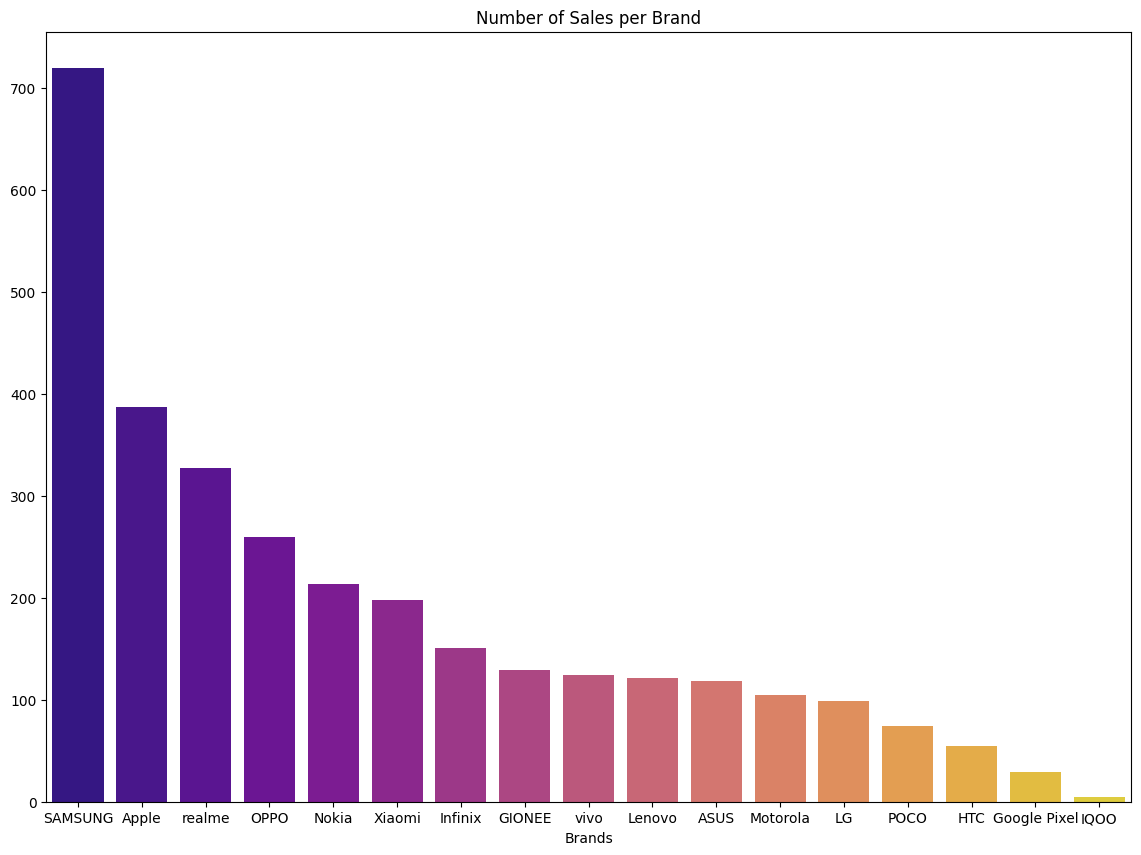

In [19]:
brand_counts = df['Brands'].value_counts()
plt.figure(figsize=(14,10))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='plasma')
plt.title('Number of Sales per Brand')

## pie chart

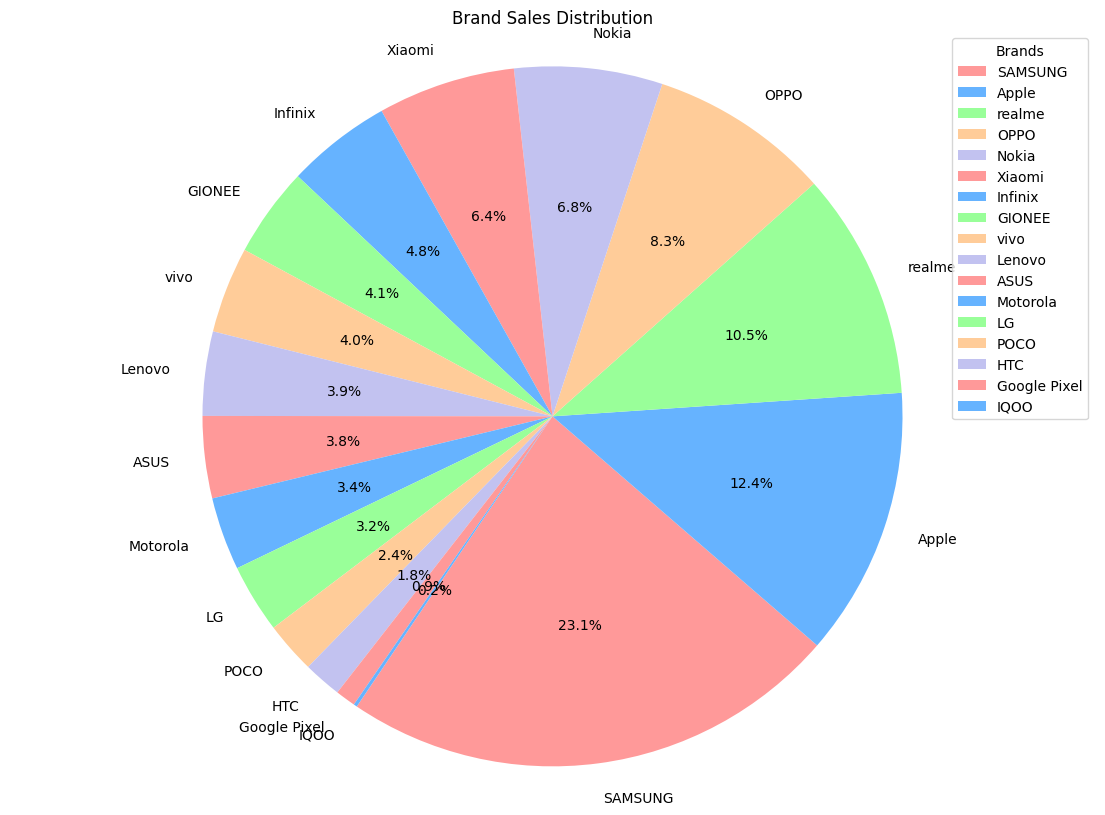

In [46]:
plt.figure(figsize=(14,10))
plt.pie(
    brand_counts, 
    labels=brand_counts.index, 
    autopct='%1.1f%%', 
    startangle=236,
    colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']  
)
plt.title('Brand Sales Distribution')
plt.axis('equal') 
plt.legend(title='Brands', loc='best')



In [33]:
best_selling_model = df['Models'].value_counts().idxmax()
print(f'Best Selling Model: {best_selling_model}')  
average_rating_per_brand = df.groupby('Brands')['Rating'].mean()
print('\nAverage Rating per Brand:')
print(average_rating_per_brand)

Best Selling Model: iPhone 11 

Average Rating per Brand:
Brands
ASUS            4.092387
Apple           4.525282
GIONEE          3.857257
Google Pixel    4.506897
HTC             3.969091
IQOO            4.400000
Infinix         4.276821
LG              3.984274
Lenovo          3.977216
Motorola        4.144630
Nokia           4.029002
OPPO            4.296492
POCO            4.385718
SAMSUNG         4.208726
Xiaomi          4.302821
realme          4.383412
vivo            4.373748
Name: Rating, dtype: float64


## correlation of dataset

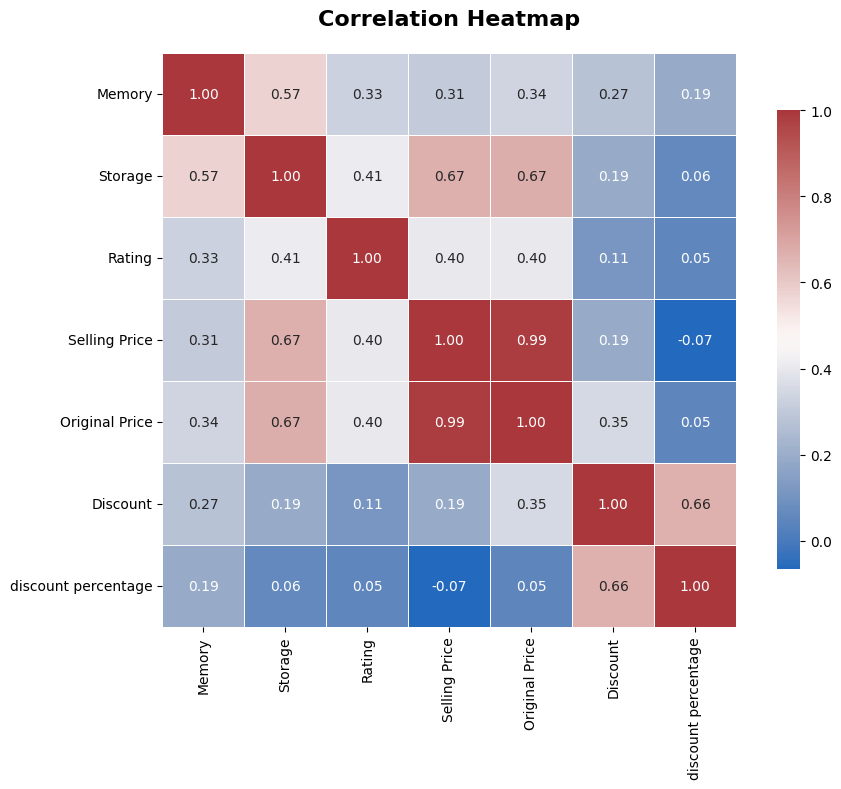

In [35]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(
    corr,
    annot=True,          
    fmt=".2f",           
    cmap="vlag",     
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Heatmap", fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## histogram

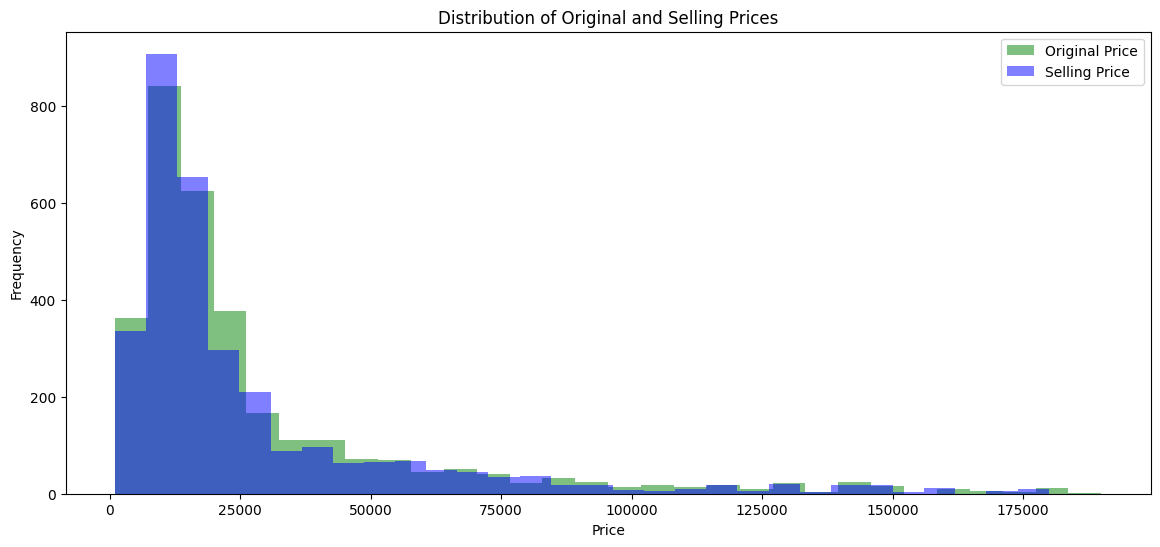

In [55]:
plt.figure(figsize=(14,6))
plt.hist(df['Original Price'], bins=30, alpha=0.5, label='Original Price', color='green')
plt.hist(df['Selling Price'], bins=30, alpha=0.5, label='Selling Price', color='blue')
plt.title('Distribution of Original and Selling Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## scatterplot

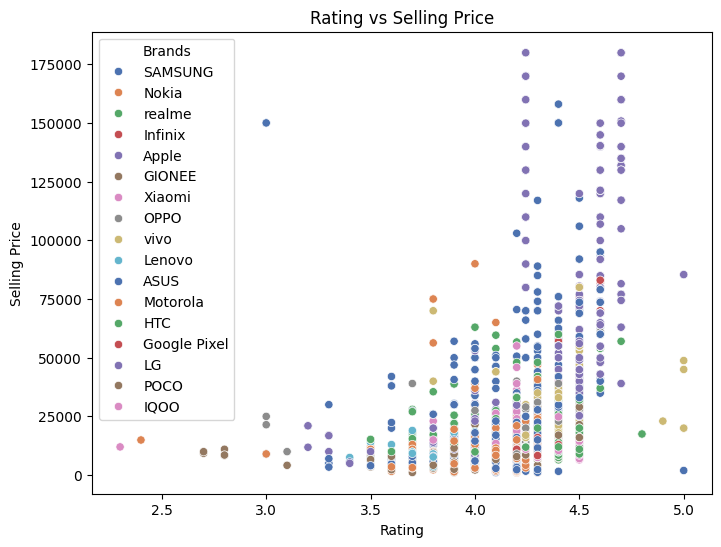

In [57]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Rating', y='Selling Price', hue='Brands', data=df, palette='deep')
plt.title('Rating vs Selling Price')
plt.xlabel('Rating')
plt.ylabel('Selling Price')
plt.show()

## train and test accuracy

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
X = df[['Brands', 'Models', 'Memory', 'Storage', 'Rating']]
y = df['Selling Price']
categorical_features = ['Brands', 'Models']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  
)
X_encoded = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)   
model = LinearRegression()
model.fit(X_train, y_train)
r2_score = model.score(X_test, y_test)
print(f'R^2 Score: {r2_score:.2f}')

R^2 Score: 0.93


## Insights & Conclusions

### 1. Model Accuracy:
The Random Forest model achieved an R² score of 0.93, showing that it predicts mobile prices with high accuracy.

### 2. Key Price Drivers:
Features like Memory, Storage, and Brand had the strongest influence on the selling price, as seen in the feature importance chart.

### 3. Brand Effect:
Some brands consistently have higher prices even for similar specs, indicating brand value impacts pricing.

### 4. Rating Correlation:
Phones with higher customer ratings generally have slightly higher prices, suggesting a link between user satisfaction and cost.

### 5. Discount Patterns:
Discount percentage showed moderate correlation with price, meaning expensive phones often get higher discounts.

# Overall Insight:
The model can reliably estimate a mobile’s price using its key specifications, making it useful for price prediction, market analysis, or competitive comparison.